# STGCN Ver1

## ref
- <https://github.com/miruetoto/yechan3/tree/main/posts/3_Researches/ITSTGCN/itstgcn>
- <https://miruetoto.github.io/yechan3/posts/3_Researches/ITSTGCN/2023-03-18-SimulationPlanner-Tutorial.html#plnr_gnar_block>

## 2022/06/01 ~ 2022/09/15

- train 2022-06-01 00:00:00 ~ 2022-08-14 17:00:00
- test 2022-08-14 18:00:00 ~ 2022-09-15 23:00:00

## import

In [9]:
import eptstgcn
import torch
import eptstgcn.planner

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [10]:
url = "https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data2/stgcn_data1.json"
loader = eptstgcn.DatasetLoader(url)
dataset = loader.get_dataset(lags=4)

In [11]:
train_dataset, test_dataset = eptstgcn.utils.temporal_signal_split(dataset, train_ratio = 0.7)

## LRNR

In [12]:
lrnr = eptstgcn.StgcnLearner(train_dataset, dataset_name = 'data2(2022/06/01 ~ 2022/09/15)')

In [13]:
lrnr.learn(filters=32, epoch=150)

In [14]:
import pickle 
with open('./lrnr_model/stgcn_ver1_data2_cancel_normal_150epoch.pickle','wb') as fw:
    pickle.dump(lrnr, fw)

In [15]:
import pickle 
with open('./lrnr_model/stgcn_ver1_data2_cancel_normal_150epoch.pickle', 'rb') as f: 
    lrnr_model = pickle.load(f)

## Visualization

### train

In [16]:
evtor = eptstgcn.Evaluator(lrnr_model, train_dataset, test_dataset)

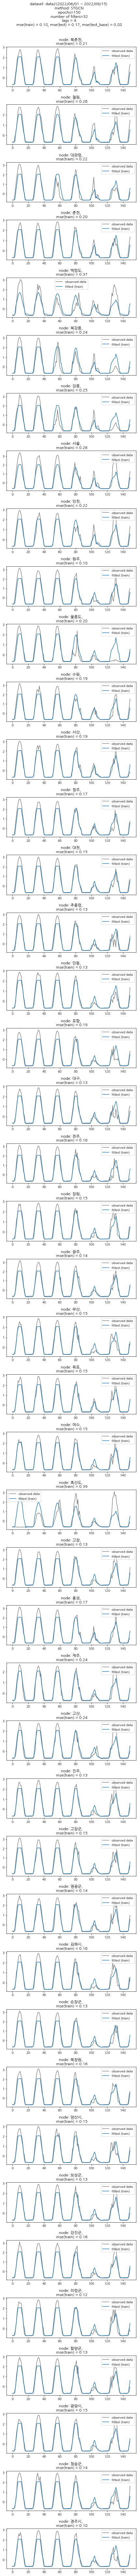

In [17]:
evtor.tr_plot(t=150, label='observed data')

### test

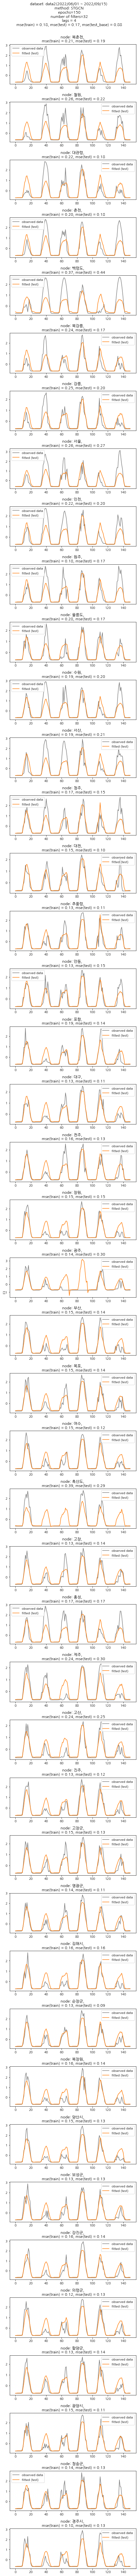

In [18]:
evtor.test_plot(t=150, label='observed data')

## Simulation

In [19]:
plans_stgcn = {
    'max_iteration': 30, 
    'method': ['STGCN'], 
    'lags': [4], 
    'nof_filters': [32], 
    'epoch': [150]
}

In [20]:
plnr = eptstgcn.planner.PLNR_STGCN(plans_stgcn,loader,dataset_name='data2')

In [21]:
plnr.simulate()

1/30 is done
2/30 is done
3/30 is done
4/30 is done
5/30 is done
6/30 is done
7/30 is done
8/30 is done
9/30 is done
10/30 is done
11/30 is done
12/30 is done
13/30 is done
14/30 is done
15/30 is done
16/30 is done
17/30 is done
18/30 is done
19/30 is done
20/30 is done
21/30 is done
22/30 is done
23/30 is done
24/30 is done
25/30 is done
26/30 is done
27/30 is done
28/30 is done
29/30 is done
30/30 is done
All results are stored in ./simulation_results/2023-04-27_22-08-24.csv


In [22]:
import pickle
with open('./simul_model/stgcn_ver1_data2_cancel_normal_150epoch.pickle','wb') as fw:
         pickle.dump(plnr, fw)

In [23]:
import pickle
with open('./simul_model/stgcn_ver1_data2_cancel_normal_150epoch.pickle','rb') as f:
         simul_model = pickle.load(f)

In [24]:
df_simul_no = simul_model.simulation_results
df_simul_no

dataset method lags nof_filters epoch mse(train) mse(test) calculation_time
0    data2  STGCN    4          32   150   0.189996  0.173553      3742.851026
1    data2  STGCN    4          32   150   0.182216   0.16745      3893.023869
2    data2  STGCN    4          32   150   0.192126  0.175373      3864.806065
3    data2  STGCN    4          32   150   0.193484  0.180455      3739.179426
4    data2  STGCN    4          32   150   0.188898  0.175463      3679.028349
5    data2  STGCN    4          32   150   0.185832  0.169814      3412.443755
6    data2  STGCN    4          32   150   0.183825   0.16889      3371.447943
7    data2  STGCN    4          32   150   0.191254  0.177824      3405.519132
8    data2  STGCN    4          32   150   0.186609  0.174553      3566.582546
9    data2  STGCN    4          32   150    0.19144  0.178698      3121.731833
10   data2  STGCN    4          32   150   0.188561  0.170901      1913.605116
11   data2  STGCN    4          32   150   0.194103  0.183562      1217.098289
12   data2  STGCN    4          32   150   0.207146  0.197766        1216.3393
13   data2  STGCN    4          32   150   0.192239  0.173347      1215.570433
14   data2  STGCN    4          32   150   0.192682  0.179757      1216.822751
15   data2  STGCN    4          32   150   0.189387   0.17637      1220.243363
16   data2  STGCN    4          32   150    0.18901  0.170644       1217.20759
17   data2  STGCN    4          32   150   0.192833  0.181281      1219.012465
18   data2  STGCN    4          32   150   0.205684  0.195635       1222.42507
19   data2  STGCN    4          32   150   0.189798  0.175815      1227.614897
20   data2  STGCN    4          32   150   0.204807   0.19537      1224.741772
21   data2  STGCN    4          32   150   0.188715  0.176382      1226.533329
22   data2  STGCN    4          32   150   0.194854  0.182779      1232.029675
23   data2  STGCN    4          32   150   0.193083  0.180377      1234.611227
24   data2  STGCN    4          32   150   0.191385  0.179724      1232.618525
25   data2  STGCN    4          32   150   0.204002  0.194082      2664.735856
26   data2  STGCN    4          32   150   0.184933  0.171661      3063.993559
27   data2  STGCN    4          32   150   0.198384  0.185356       3719.31226
28   data2  STGCN    4          32   150   0.195301  0.183986        3448.4107
29   data2  STGCN    4          32   150    0.18867  0.170441      3441.653775

In [25]:
print('150에폭 stgcn ver1 끝')

150에폭 stgcn ver1 끝


In [28]:
df_simul_no['mse(test)'].mean()

0.17891031752030054

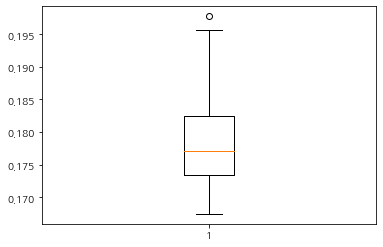

In [26]:
import matplotlib.pyplot as plt
plt.boxplot(df_simul_no['mse(test)'])
plt.show()